# Kapittel 9

0.7786440490093194


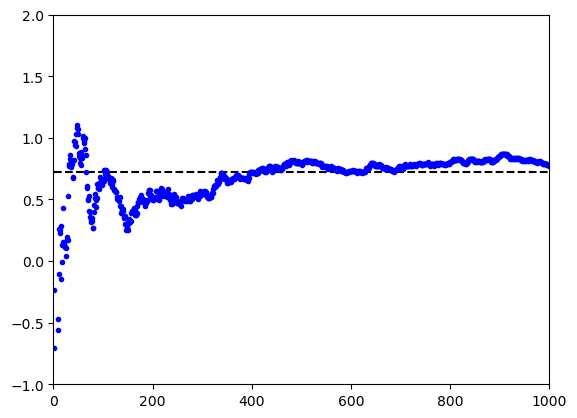

In [1]:
# MonteCarloPlott.m

import numpy as np
import matplotlib.pyplot as plt
import random

# Skript som estimerer eit integral ved Monte Carlo-metoden
# Sjølve integralet, og den analytiske løysninga av det, er
# spesifisert i starten av skriptet - i tillegg til
# det maksimale talet på trekk.

# Integrasjonsgrenser
a = -1
b = 3

# Integrand
def funk(x):
    return x * np.sin(x**2)

# Kjent analytisk svar:
Fasit = (np.cos(1)-np.cos(9))/2

# Maksimalt tal på trekk:
Nmax = 1000

# Initierer summen
MCsum = 0

# Lagar klart plott for estimata - saman med eksakt svar
plt.plot(range(1, Nmax+1), Fasit*np.ones(Nmax), 'k--')

# Vi utfører uttrekka og legg til summen for kvar gong
for n in range(1, Nmax+1):
  x = a+(b-a)*random.random()
  MCsum = MCsum+funk(x)
  Estimat = (b-a)*MCsum/n          # Integral-estimat
  plt.plot(n, Estimat, 'b.')       # Plottar estimat

plt.xlim(0, Nmax)
plt.ylim(-1, 2)

# Skriv svaret til skjerm
print(Estimat)


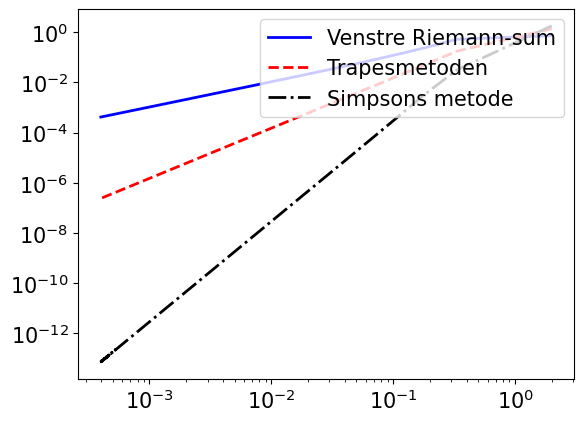

In [8]:
# RiemannFunkV.m (fra Canvas)

def RiemannFunkV(Funk, a, b, N):
    
    # Funksjonsfil som estimerar eit integral som ein 
    # Riemann-sum på ein regulær partisjon med venstre-
    # seleksjon.
    # Integranden og grenser er hard-koda, input er
    # N, talet på del-intervall.
    
    # Oppdeling
    DeltaX = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
      x = a+(n-1)*DeltaX             # Oppdaterar x
      R = R+DeltaX*Funk(x)           # Oppdaterar summen

    return R

# TrapesFunk.m

def TrapesFunk(funk,a,b,n):
    
    # Implementering av trapesmetoden for numerisk integrasjon.
    # Integranden funk, grensene a og b, og oppdelinga n
    # blir gitt som input.
    
    # Steglengda
    h = (b-a)/n
    
    # Bidrag frå endane
    T = h/2*(funk(a)+funk(b))
    
    # Resten av bidraga
    for i in range(1, n):
        xi = a+i*h
        T = T+h*funk(xi)

    return T

# SimpsonsFunk.m (fra Canvas)

def SimpsonsFunk(Funk, a, b, N):
    
    # Funksjonsfil som estimerar eit integral ved
    # hjelp av Simpsons metode.
    # Integranden og grenser er hard-koda, input er
    # N, talet på del-intervall.
    
    # Oppdeling
    DeltaX = (b-a)/N
    
    # Initerar summen og tar med endane:
    S = (Funk(a)+Funk(b))
    
    # Oddetalsbidrag
    for n in range(1, N, 2):
      x = a+n*DeltaX                 # Oppdaterar x
      S = S+4*Funk(x)           # Oppdaterar summen
    
    # Partalssbidrag
    for n in range(2, N-1, 2):
      x = a+n*DeltaX                 # Oppdaterar x
      S = S+2*Funk(x)           # Oppdaterar summen
    
    # Korrigerar svar med DeltaX/3
    S = S*DeltaX/3
    
    return S

# PlottFeilenInt.m

# Skript som plottar feilen i eit estimat for ein
# Riemann-sum, trapesmetoden og Simpsons metode.

# Spesifiserer integrand, grenser og eksakt svar
def funk(x):
    return x*np.sin(x**2)

a = -1
b = 3
Fasit = (np.cos(1)-np.cos(9))/2

# Lagar vektor med n-verdiar
nStart = 2
nSteg = 10
nSlutt = 10000
nVektor = np.arange(nStart, nSlutt+1, nSteg)
hVektor = (b-a)/nVektor

Vvektor = np.zeros_like(nVektor, dtype=np.float64)
Tvektor = np.zeros_like(nVektor, dtype=np.float64)
Svektor = np.zeros_like(nVektor, dtype=np.float64)

# Lagar vektorar med estimat
indeks = 0
for n in nVektor:
  Vvektor[indeks] = RiemannFunkV(funk,a,b,n)
  Tvektor[indeks] = TrapesFunk(funk,a,b,n)
  Svektor[indeks] = SimpsonsFunk(funk,a,b,n)
  indeks = indeks+1

# Plottar feilen
plt.rcParams.update({'font.size': 15})
plt.loglog(hVektor, abs(Vvektor-Fasit), 'b-', linewidth=2, label="Venstre Riemann-sum")
plt.loglog(hVektor, abs(Tvektor-Fasit), 'r--', linewidth=2, label="Trapesmetoden")
plt.loglog(hVektor, abs(Svektor-Fasit), 'k-.', linewidth=2, label="Simpsons metode")

plt.legend(loc="upper right")


In [4]:
# RektangelSum.m

# Skript som reknar ut ein sum av areal av rektangel

# Talet på rektangel
#n=input('Kor mange rektangel? ')
n = 10
print(n)
# Funksjonen
def funk(x):
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summen V
h = (b-a)/n
V = 0

for i in range(0, n):
    xi = a+i*h
    V = V+h*funk(xi)

# Skriv summen V til skjerm
print(V)


10
17.48


In [6]:
# RektangelSumV2.m

# Skript som estimerer eit integral på tre måtar:
# Venstre og høgre Riemann-sum og trapesmetoden

# Talet på rektangel
#n=input('Kor mange rektangel? ')
n = 10
print(n)

# Funksjonen
def funk(x):
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summane V og H
h = (b-a)/n
V = 0
H = 0

# Reknar ut venstresummen
for i in range(0, n):
    xi = a+i*h
    V = V+h*funk(xi)

# Reknar ut høgresummen
for i in range(1, n+1):
    xi = a+i*h
    H = H+h*funk(xi)


# Skriv summane V, H og T til skjerm
print(V)
print(H)
T=(V+H)/2                   # Trapessummen
print(T)


10
17.48
22.68
20.08


In [11]:
# RiemannFunk.m

import numpy as np

def RiemannFunk(x, y):
    
    # Funksjon som beregner venstre Rimann sum for gitte x- og y-vektorer
    # Partisjonen, gitt ved x-vektoren, må være regulær.
    
    # Bestemmer steglengda og antall steg
    h = x[1]-x[0]
    n = len(x)
    
    # Initierer summen
    V = 0
    
    for i in range(0, n):
        V = V+h*y[i]
    
    return V

print(RiemannFunk(np.arange(0,10), np.arange(0,10)))

45


In [12]:
# RiemannFunkMidt.m

def RiemannFunk(x, y):
    
    # Funksjon som beregner venstre Rimann sum for gitte x- og y-vektorer
    # Partisjonen, gitt ved x-vektoren, må være regulær.
    
    # Bestemmer steglengda og antall steg
    h = x[1]-x[0]
    n = len(x)
    
    # Initierer summen
    V = 0
    
    for i in range(0, n):
        V = V+h*y[i]

    return V

print(RiemannFunk(np.arange(0,10), np.arange(0,10)))

45


In [35]:
# Simpson.m

# Implementering av Simpsons metode.
# Integrasjonsgrensene a og b, oppdelinga n og integranden
# funk blir gitt heilt i toppen av skriptet.
# For å gi oppdelinga n brukar vi input-funksjonen

# Integrasjonsgrensene
a = 0
b = 1

# Integranden
def funk(x):
    return np.cos(np.pi*x)

# Oppdeling (kontrollerer at n er eit partal)
#n=input('Gi oppdelinga n: ')
n = 10
print(n)
if round(n/2) != n/2:
    print('n må vere eit partal')
    raise

h = (b-a)/n                  # Steglengda

# Bidrag frå endane
S = h/3*(funk(a)+funk(b))

# Oddetalsbidrag:
for i in range(1, n, 2):
    xi = a+i*h
    S = S+h/3*4*funk(xi)

# Partalsbidrag
for i in range(2, (n-1), 2):
    xi = a+i*h
    S = S+h/3*2*funk(xi)

# Skriv svaret til skjerm
print(S)


10
0.0


In [26]:
# SimpsonFunk.m

def SimpsonFunk(x, y):

    # Funksjon som beregner integral ved Simpsons metode 
    # for gitte x- og y-vektorer
    # Partisjonen, gitt ved x-vektoren, må være regulær.
    
    # Bestemmer steglengda og antall steg
    h = x[1]-x[0]
    n = len(x)
    
    # Ende-bidrag:
    S = h/3*(y[0]+y[n-1])
    
    # Partalls-bidrag
    for i in range(2, n-1, 2):
        S = S+h/3*4*y[i]
    
    # Oddetalls-bidrag
    for i in range(1, n-1, 2):
        S = S+h/3*2*y[i]
    
    return S

print(SimpsonFunk(np.arange(0,10), np.arange(0,10)))

40.33333333333333


In [40]:
# Trapes.m

# Implementering av trapesmetoden for numerisk integrasjon.
# Integrasjonsgrensene a og b, oppdelinga n og integranden
# funk blir gitt heilt i toppen av skriptet.
# For å gi n brukar vi input-funksjonen.

# Integrasjonsgrenser
a = -1
b = 1

# Integranden
def funk(x):
    return x**6

# Oppdeling
#n=input('Gi oppdelinga n: ')
n = 10
print(n)
h = (b-a)/n                  # Steglengda

# Bidrag frå endane
T = h/2*(funk(a)+funk(b))

# Resten av bidraga
for i in range(1, n): # TODO: Er det feil i MATLAB-scriptet her? Endepunkt b tas med to ganger?
    xi = a+i*h
    T = T+h*funk(xi)

# Skriv svaret til skjerm
print(T)


10
0.32518400000000003
